#### m: markdown
#### y: cell mode

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

In [2]:
!pip install pyreadstat

In [3]:
raw_welfare = pd.read_spss('Data/Koweps_hpwc14_2019_beta2.sav')

In [27]:
list_job = pd.read_excel('Data/Koweps_Codebook_2019.xlsx', sheet_name='직종코드')

In [4]:
welfare = raw_welfare.copy()
welfare.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [5]:
welfare = welfare.rename(
columns = {'h14_g3' : 'sex', # 성별
'h14_g4' : 'birth', # 태어난 연도
'h14_g10' : 'marriage_type', # 혼인 상테
'h14_g11' : 'religion', # 종교
'p1402_8aq1' : 'income', # 일한달의 월 평균 임금
'h14_eco9' : 'code_job', # 직종
'h14_reg7' : 'code_region' # 7개 권역별 지역 구분
})
welfare[['sex', 'birth', 'marriage_type']].head()

,sex,birth,marriage_type
0,2.0,1945.0,2.0
1,1.0,1948.0,2.0
2,1.0,1942.0,3.0
3,1.0,1962.0,1.0
4,2.0,1963.0,1.0


In [6]:
#성별 빈도수
welfare['sex'].value_counts()

2.0    7913
1.0    6505
Name: sex, dtype: int64

In [7]:
#성별에서 무응답(1,2 이외 값) 결측치 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])
welfare['sex'].isna().sum()

0

In [25]:
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

<AxesSubplot:xlabel='sex', ylabel='count'>

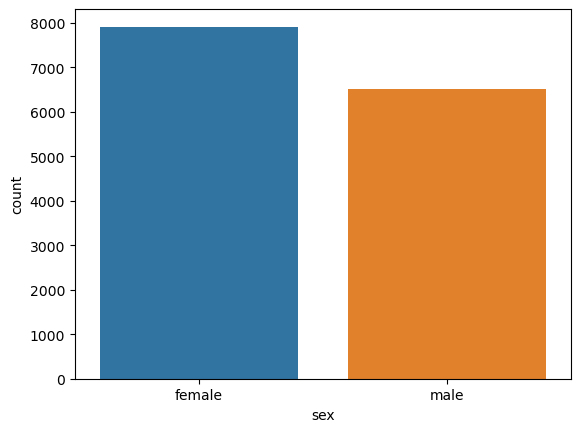

In [9]:
sns.countplot(data=welfare, x='sex')
#barplot으로 그리기
#result = welfare.groupby('sex', as_index=False).agg(n = ('sex', 'count'))
#sns.barplot(result, x= 'sex', y ='n')

<AxesSubplot:xlabel='income', ylabel='Count'>

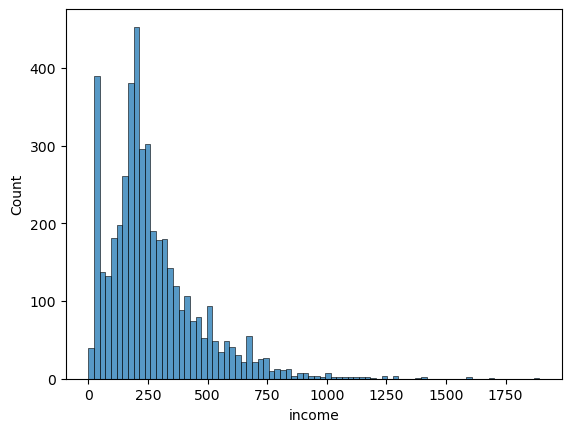

In [11]:
#월급 분포를 히스토그램으로 확인
sns.histplot(data=welfare, x='income')
#sns.histplot(data=welfare, x='income', bins = 10)

In [12]:
# 이상치 확인
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [13]:
# 결측치 확인
# 직업이 없어서 월급을 받지 못하는 응답자
welfare['income'].isna().sum()

9884

In [17]:
# 이상치(9999) 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

In [19]:
# 결측치 확인
welfare['income'].isna().sum()
# 결측치 제거
#welfare.dropna(subset=['income'])['income'].isna().sum()

9884

In [20]:
# 성별 월급 평균표 만들기
sex_income = welfare.dropna(subset = ['income'])\
.groupby('sex', as_index=False)\
.agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<AxesSubplot:xlabel='sex', ylabel='mean_income'>

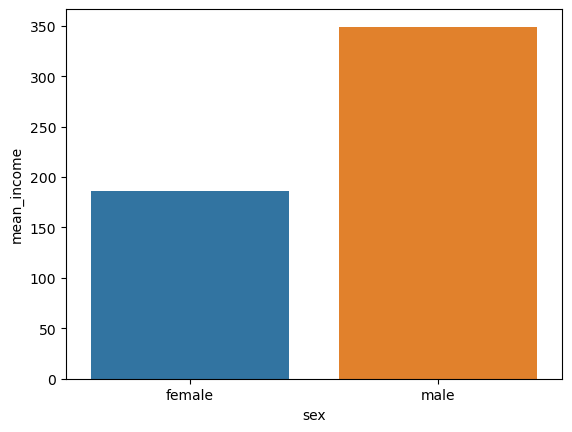

In [21]:
sns.barplot(data=sex_income, x='sex', y='mean_income')

In [8]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<AxesSubplot:xlabel='birth', ylabel='Count'>

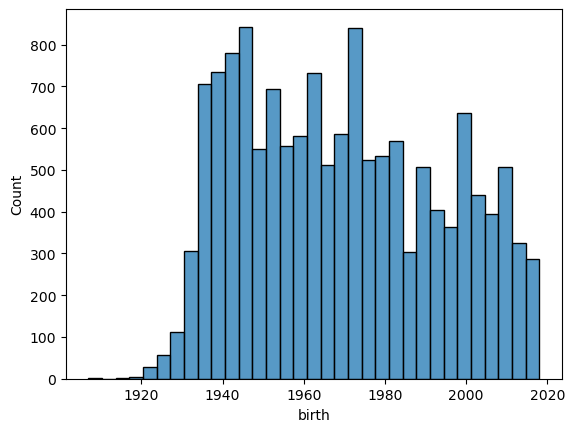

In [9]:
sns.histplot(data=welfare, x='birth')

In [10]:
# 이상치(9999)를 결측치 처리
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

In [11]:
# 결측치(nan) 확인
welfare['birth'].isna().sum()

0

In [12]:
# 파생 변수 나이(age) 추가하기
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

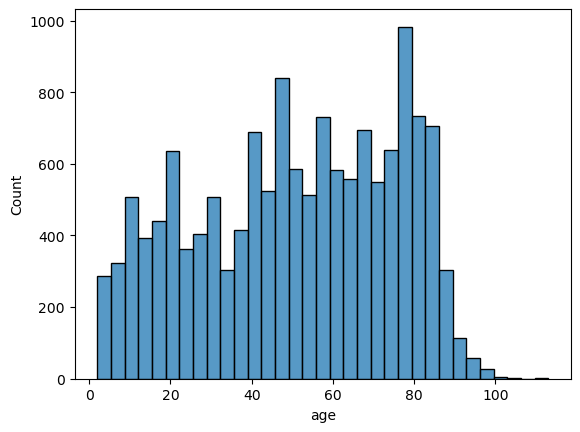

In [13]:
sns.histplot(data=welfare, x='age')

In [14]:
# 나이에 따른 월급 평균표 만들기
age_income = welfare.dropna(subset = ['income'])\
.groupby('age')\
.agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<AxesSubplot:xlabel='age', ylabel='mean_income'>

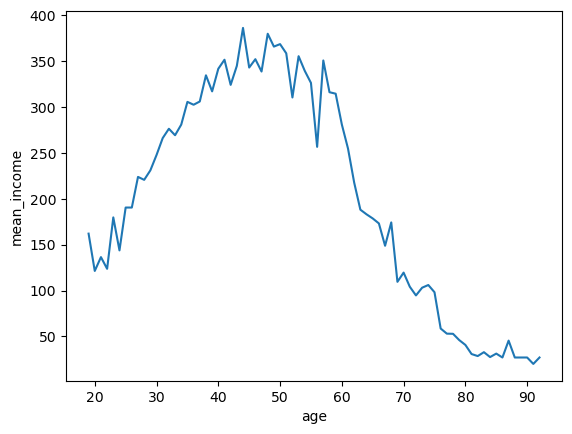

In [15]:
sns.lineplot(data=age_income, x='age', y='mean_income')

In [16]:
 # 연령대 변수 만들기
welfare = welfare.assign(ageg=np.where(welfare['age'] < 30, 'young',
                                      np.where(welfare['age']<=59, 'middle', 'old')))

<AxesSubplot:xlabel='ageg', ylabel='count'>

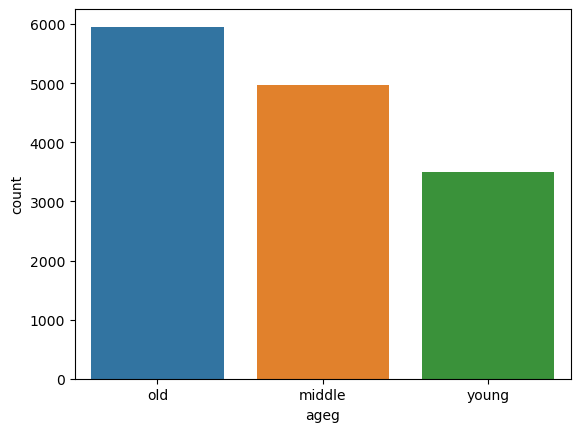

In [17]:
sns.countplot(data=welfare, x='ageg')

In [18]:
# 연령대 별 월급 평균표 만들기
ageg_income = welfare.dropna(subset=['income'])\
.groupby('ageg', as_index=False)\
.agg(mean_income=('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

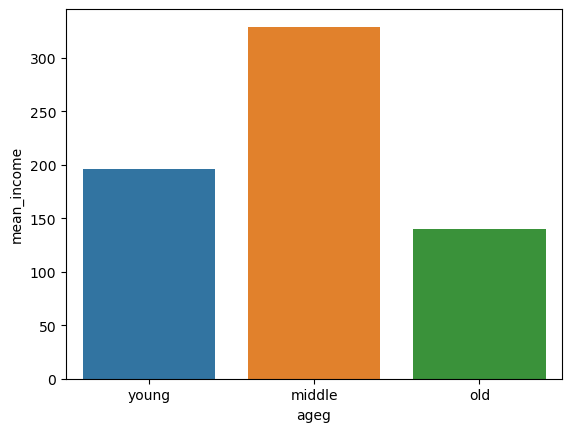

In [20]:
sns.barplot(data=ageg_income, x='ageg', y='mean_income', order=['young', 'middle', 'old'])

In [21]:
# 연령대 및 성별에 따른 월급 평균 표 만들기
sex_income = \
welfare.dropna(subset=['income']) \
.groupby(['ageg', 'sex'], as_index=False) \
.agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,1.0,409.541228
1,middle,2.0,230.481735
2,old,1.0,204.570231
3,old,2.0,90.228896
4,young,1.0,204.909548
5,young,2.0,189.822222


<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

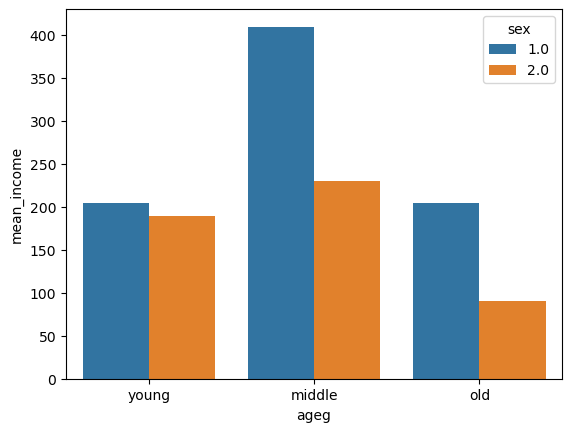

In [22]:
sns.barplot(data=sex_income, x='ageg', y='mean_income', hue='sex',
order = ['young', 'middle', 'old'])

In [23]:
# 나이 및 성별 월급 평균표 만들기
sex_age = welfare.dropna(subset=['income']) \
.groupby(['age', 'sex'], as_index=False) \
.agg(mean_income = ('income', 'mean'))
sex_age.head()

,age,sex,mean_income
0,19.0,1.0,162.000000
1,20.0,1.0,155.000000
2,20.0,2.0,87.666667
3,21.0,1.0,186.000000
4,21.0,2.0,124.000000


<AxesSubplot:xlabel='age', ylabel='mean_income'>

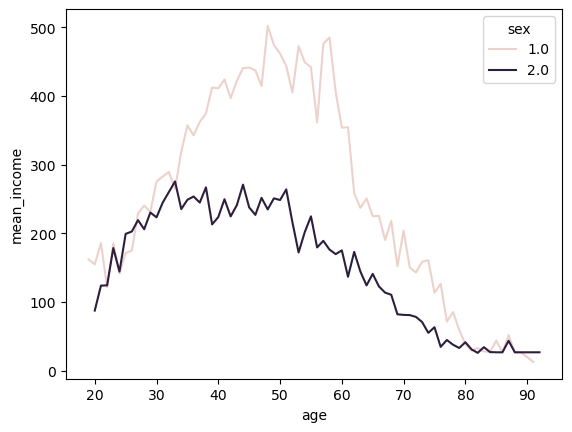

In [24]:
sns.lineplot(data=sex_age, x='age', y='mean_income', hue='sex')

In [28]:
# welfare와 list_job 결합(직업코드에 해당하는 직업명 넣기)
welfare = welfare.merge(list_job, how='left', on='code_job')
#welfare = pd.merge(welfare, list_job, how='left', on = 'code_job')

In [29]:
# welfare에 직업코드에서 결측치 제거
welfare.dropna(subset=['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [30]:
# 직업별 월급 평균표 만들기
job_income = welfare.dropna(subset=['job', 'income']) \
.groupby('job', as_index=False) \
.agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


<AxesSubplot:xlabel='mean_income', ylabel='job'>

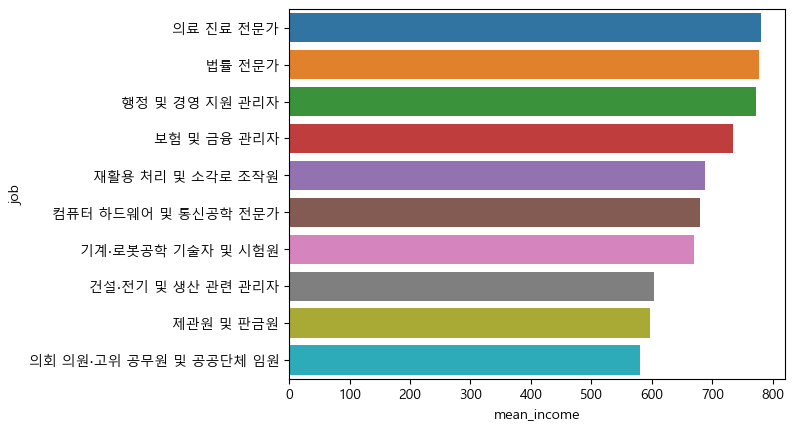

In [33]:
top10 = job_income.sort_values('mean_income', ascending=False).head(10)
sns.barplot(data=top10, y='job', x='mean_income')

[(0.0, 800.0)]

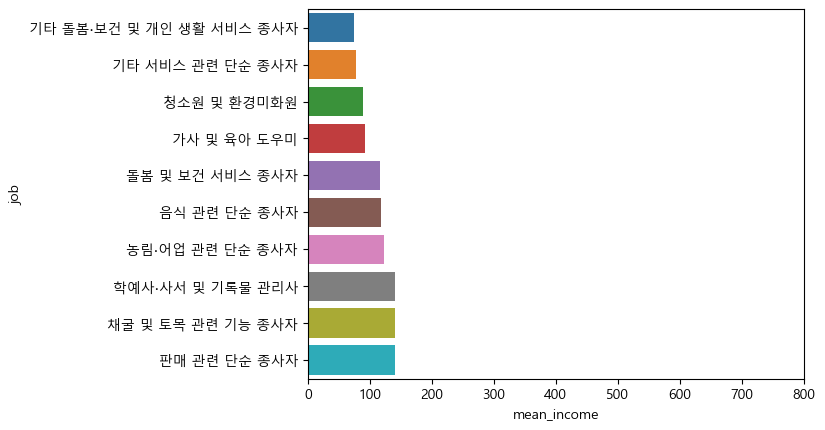

In [34]:
bottom10 = job_income.sort_values('mean_income').head(10)
# 막대 그래프 그리기 (상위 월급 직업군과 스케일을 맞추기 위해 x 범위를 0 ~ 800만원으로
# sns.barplot(data=bottom10, y='job', x='mean_income')
sns.barplot(data=bottom10, y='job', x='mean_income').set(xlim=(0, 800))


In [36]:
# 남성 직업 빈도 상위 10개 추출
job_male = welfare.dropna(subset=['job'])\
.query('sex=="male"')\
.groupby('job', as_index=False)\
.agg(n=('job', 'count'))\
.sort_values('n', ascending=False)\
.head(10)

# 여성 직업 빈도 상위 10개 추출
job_female = welfare.dropna(subset=['job'])\
.query('sex=="female"')\
.groupby('job', as_index=False)\
.agg(n=('job', 'count'))\
.sort_values('n', ascending=False)\
.head(10)

[(0.0, 500.0)]

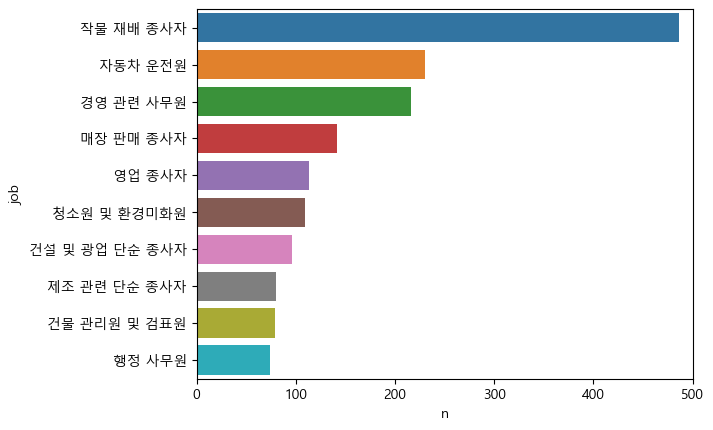

In [37]:
sns.barplot(data=job_male, x='n', y='job').set(xlim = (0, 500))

[(0.0, 500.0)]

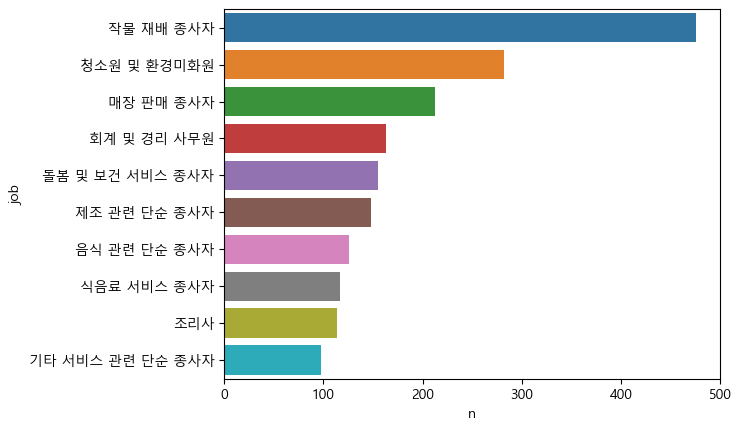

In [38]:
sns.barplot(data=job_female, x='n', y='job').set(xlim = (0, 500))

In [39]:
# 종교 유무에 이름 부여
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')
welfare['religion'].head()

0    yes
1     no
2    yes
3    yes
4    yes
Name: religion, dtype: object

<AxesSubplot:xlabel='religion', ylabel='count'>

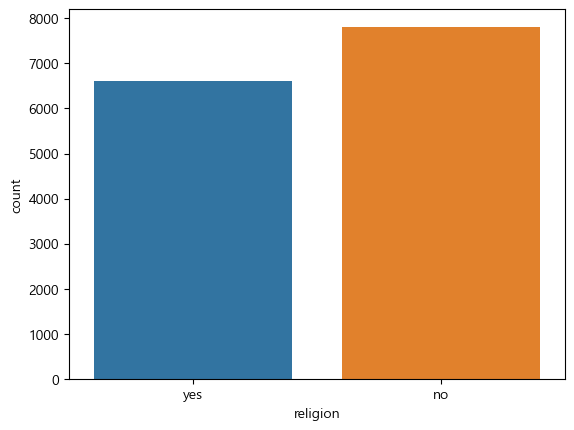

In [40]:
sns.countplot(data=welfare, x='religion')

In [41]:
# 이혼 여부 변수 만들기
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
np.where(welfare['marriage_type'] == 3, 'divorce',
'etc'))
# 이혼 여부별 빈도
n_divorce = welfare.groupby('marriage', as_index = False) \
.agg(n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<AxesSubplot:xlabel='marriage', ylabel='n'>

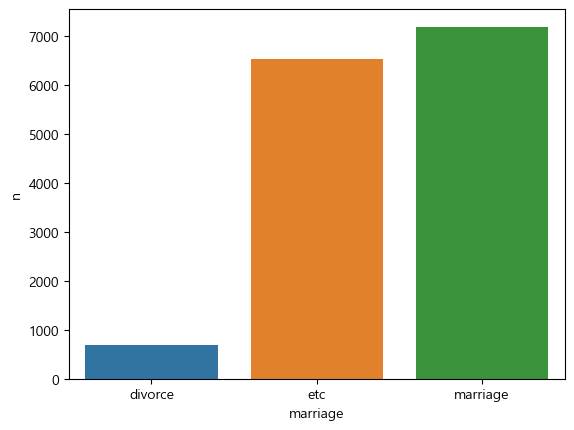

In [42]:
sns.barplot(data=n_divorce, x='marriage', y='n')

In [43]:
rel_div = welfare.query('marriage != "etc"') \
.groupby(['religion', 'marriage'], as_index = False)\
.agg(n=('religion', 'count'))
rel_div

,religion,marriage,n
0,no,divorce,384
1,no,marriage,3660
2,yes,divorce,305
3,yes,marriage,3530


In [44]:
rel_div = welfare.query('marriage != "etc"') \
.groupby('religion', as_index = False)['marriage']\
.value_counts()
rel_div

,religion,marriage,count
0,no,marriage,3660
1,no,divorce,384
2,yes,marriage,3530
3,yes,divorce,305


In [45]:
rel_div = welfare.query('marriage != "etc"') \
.groupby('religion', as_index = False)['marriage']\
.value_counts(normalize = True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [46]:
rel_div = rel_div.query('marriage == "divorce"') \
.assign(proportion = rel_div['proportion']*100) \
.round(1)
rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<AxesSubplot:xlabel='religion', ylabel='proportion'>

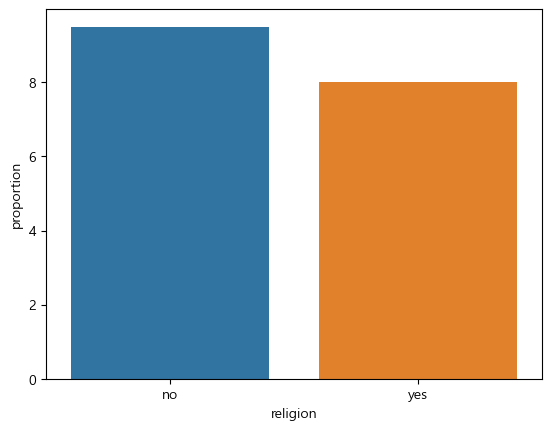

In [47]:
sns.barplot(data=rel_div, x='religion', y='proportion')